### Student Information
Name: 吳昀翰

Student ID: r13922135

GitHub ID: geeklad001

Kaggle name: geeklad001

Kaggle private scoreboard snapshot: (Late Submission is not shown in the leaderboard.)
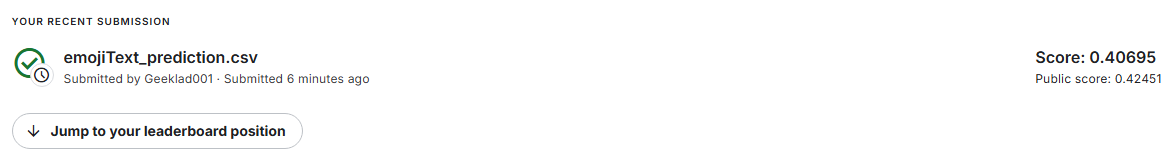

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__.

# Preparation

*   Install packages
*   prepare cloud storage
*   prepare data



## Cloud Storage (Data is predownloaded)

In [1]:
### Begin Assignment Here
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/NTHU\ Data\ Mining\ \(2024\)/Lab2/DM2024-Lab2-Homework')

%cd /content/drive/MyDrive/NTHU\ Data\ Mining\ \(2024\)/Lab2/DM2024-Lab2-Homework
!ls

/content/drive/.shortcut-targets-by-id/10C_kpyr0T-52CpDuvG_-lGDDO-ANn-bs/NTHU Data Mining (2024)/Lab2/DM2024-Lab2-Homework
data  DM2024-Lab2-Homework.ipynb  README.md


## Install Packages

In [15]:

!pip3 install scikit-learn --upgrade
!pip3 install pandas --upgrade
!pip3 install numpy --upgrade
!pip3 install matplotlib --upgrade
!pip3 install plotly --upgrade
!pip3 install seaborn --upgrade
!pip3 install nltk --upgrade
!pip3 install umap-learn --upgrade

!pip3 install gensim --upgrade
#!pip3 install tensorflow --upgrade
!pip3 install tensorflow==2.17.0
!pip3 install keras --upgrade

!pip3 install ollama --upgrade
!pip3 install langchain --upgrade
!pip3 install langchain_community --upgrade
!pip3 install langchain_core --upgrade
!pip3 install beautifulsoup4 --upgrade
!pip3 install chromadb --upgrade
!pip3 install gradio --upgrade

!pip3 install emoji --upgrade
!pip3 install demoji --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 108.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 104.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip

## Check availability of packages

In [16]:
# import library
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import umap
import gensim
import tensorflow
import keras
import ollama
import langchain
import langchain_community
import langchain_core
import bs4
import chromadb
import gradio
import emoji
import demoji

nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

demoji.download_codes()

%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.3.3
tensorflow: 2.17.0
keras: 3.7.0


<ipython-input-16-1d64c7b45ce9>:25: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


## Load and look at Data

In [ ]:
import pandas as pd

# Contains the table of which tweet ID belongs to "training data" or "test data"
df_data_class = pd.read_csv(f"./data/data_identification.csv")
print("df_data_class", df_data_class.head())

# Contains the labels of the corresponding tweet IDs.
df_data_emotion = pd.read_csv(f"./data/emotion.csv")
print("\ndf_data_label", df_data_emotion.head())

# Contains info about the tweets
df_data_original_tweets = pd.read_json(f"./data/tweets_DM.json", lines=True) # add parameter `lines = True` to prevent trailing error
print("\ndf_data_original_tweets", df_data_original_tweets.head())

df_data_class    tweet_id identification
0  0x28cc61           test
1  0x29e452          train
2  0x2b3819          train
3  0x2db41f           test
4  0x2a2acc          train

df_data_label    tweet_id       emotion
0  0x3140b1       sadness
1  0x368b73       disgust
2  0x296183  anticipation
3  0x2bd6e1           joy
4  0x2ee1dd  anticipation

df_data_original_tweets    _score          _index                                            _source  \
0     391  hashtag_tweets  {'tweet': {'hashtags': ['Snapchat'], 'tweet_id...   
1     433  hashtag_tweets  {'tweet': {'hashtags': ['freepress', 'TrumpLeg...   
2     232  hashtag_tweets  {'tweet': {'hashtags': ['bibleverse'], 'tweet_...   
3     376  hashtag_tweets  {'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...   
4     989  hashtag_tweets  {'tweet': {'hashtags': [], 'tweet_id': '0x2de2...   

            _crawldate   _type  
0  2015-05-23 11:42:47  tweets  
1  2016-01-28 04:52:09  tweets  
2  2017-12-25 04:39:20  tweets  
3  2016-01-24 2

### Format df_data_tweets and get rid of unwanted attributes

In [ ]:
df_data_tweets = df_data_class.copy(deep=True)

### Drop all duplicated data.
df_data_tweets.drop_duplicates()

### Left merge with emotions csv
df_data_tweets = df_data_tweets.merge(df_data_emotion, on='tweet_id', how='left')

### Left merge with tweet json
# Format '_source' field
df_temp = pd.json_normalize(df_data_original_tweets['_source'])
df_temp.columns = df_temp.columns.str.replace('^tweet\.', '', regex=True)

# Merge
df_data_tweets = df_data_tweets.merge(df_temp, on='tweet_id', how='left')

df_data_tweets

,tweet_id,identification,emotion,hashtags,text
0,0x28cc61,test,NaN,[],@Habbo I've seen two separate colours of the e...
1,0x29e452,train,joy,[],Huge Respect🖒 @JohnnyVegasReal talking about l...
2,0x2b3819,train,joy,"[spateradio, app]",Yoooo we hit all our monthly goals with the ne...
3,0x2db41f,test,NaN,[],@FoxNews @KellyannePolls No serious self respe...
4,0x2a2acc,train,trust,[],@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...
...,...,...,...,...,...
1867530,0x227e25,train,disgust,[rip],@BBCBreaking Such an inspirational talented pe...
1867531,0x293813,train,sadness,"[libtards, Hillary, lost, sad, growup, Trump]",And still #libtards won't get off the guy's ba...
1867532,0x1e1a7e,train,joy,"[seeds, Joy, GLTChurch]",When you sow #seeds of service or hospitality ...
1867533,0x2156a5,train,trust,[],@lorettalrose Will you be displaying some <LH>...


### Clean Tweet Text
Reference:

https://www.kaggle.com/code/abdmental01/text-preprocessing-nlp-steps-to-process-text

https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt

https://www.kaggle.com/code/life2short/data-processing-replace-abbreviation-of-word

In [17]:
# List of Abbreviations
punctuation='["\'?,\.]'
chat_words_dict = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing",
}

abbr_dict = {
    "what's":"what is",
    "what're":"what are",
    "who's":"who is",
    "who're":"who are",
    "where's":"where is",
    "where're":"where are",
    "when's":"when is",
    "when're":"when are",
    "how's":"how is",
    "how're":"how are",

    "i'm":"i am",
    "we're":"we are",
    "you're":"you are",
    "they're":"they are",
    "it's":"it is",
    "he's":"he is",
    "she's":"she is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",

    "i've":"i have",
    "we've":"we have",
    "you've":"you have",
    "they've":"they have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",

    "i'll":"i will",
    "we'll":"we will",
    "you'll":"you will",
    "he'll":"he will",
    "she'll":"she will",
    "it'll":"it will",
    "they'll":"they will",

    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not",
    punctuation:'',
    '\s+':' ', # replace multi space with one single space
}

patterns = {
    r'@\w+',        # Mentions
    r'http\S+|www.\S+',   # Links
    r'[^a-zA-Z\s]',     # Symbols
}

### Data Version 1: Emoji Text


*   **Replace emojis with descriptions**
*   Replace abbreviations with original text
*   Remove links and mentions(@)
*   Remove stop words




In [ ]:
# Only need to run once
import regex as re  # Import regex module (not re)
import nltk
import emoji

df_data_tweets_emojiText = df_data_tweets.copy(deep=True)

def replace_chat_words(text):
    new_text = []
    for i in text.split():
        if i.upper() in chat_words_dict:
            new_text.append(chat_words_dict[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)

def replace_abbreviations(text):
    for abbr, replacement in abbr_dict.items():
        text = re.sub(abbr, replacement, text)
    return text

def clean_tweet_text(df, col):
    # Convert emojis to word
    df[col] = df[col].apply(emoji.demojize)

    # Replace underscores with spaces
    df[col] = df[col].str.replace('_', ' ')

    # Convert chat words to original text
    df[col] = df[col].apply(replace_chat_words)

    # Convert to lowercase
    df[col] = df[col].str.lower()

    # Convert abbreviations to word
    df[col] = df[col].apply(replace_abbreviations)

    # Remove the patterns
    for pattern in patterns:
        df[col] = df[col].str.replace(pattern, '', regex=True)

    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    df[col] = df[col].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

clean_tweet_text(df_data_tweets_emojiText, 'text')
df_data_tweets_emojiText

,tweet_id,identification,emotion,hashtags,text
0,0x28cc61,test,NaN,[],@Habbo I've seen two separate colours of the e...
1,0x29e452,train,joy,[],Huge Respect🖒 @JohnnyVegasReal talking about l...
2,0x2b3819,train,joy,"[spateradio, app]",Yoooo we hit all our monthly goals with the ne...
3,0x2db41f,test,NaN,[],@FoxNews @KellyannePolls No serious self respe...
4,0x2a2acc,train,trust,[],@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...
...,...,...,...,...,...
1867530,0x227e25,train,disgust,[rip],@BBCBreaking Such an inspirational talented pe...
1867531,0x293813,train,sadness,"[libtards, Hillary, lost, sad, growup, Trump]",And still #libtards won't get off the guy's ba...
1867532,0x1e1a7e,train,joy,"[seeds, Joy, GLTChurch]",When you sow #seeds of service or hospitality ...
1867533,0x2156a5,train,trust,[],@lorettalrose Will you be displaying some <LH>...


In [ ]:
df_data_tweets_emojiText.to_csv('data/cleaned_tweets_with_textEmoji.csv', index=False)

,tweet_id,identification,emotion,hashtags,text
0,0x28cc61,test,NaN,[],seen two separate colours elegant furni homepa...
1,0x29e452,train,joy,[],huge respect talking losing dad cancerif dont ...
2,0x2b3819,train,joy,"[spateradio, app]",yoooo hit monthly goals new app two weeks spat...
3,0x2db41f,test,NaN,[],serious self respecting individual believes mu...
4,0x2a2acc,train,trust,[],bch well done team glowing star lh every one
...,...,...,...,...,...
1867530,0x227e25,train,disgust,[rip],inspirational talented person miss rip lh
1867531,0x293813,train,sadness,"[libtards, Hillary, lost, sad, growup, Trump]",still libtards get guys back hillary lost fuck...
1867532,0x1e1a7e,train,joy,"[seeds, Joy, GLTChurch]",sow seeds service hospitality joy earth yield ...
1867533,0x2156a5,train,trust,[],displaying lh wares


### Data Version 2: Create new attribute "Emojis"


*   **Create a new attribute "Emojis" and remove emojis in the original text**
*   Replace abbreviations with original text
*   Remove links and mentions(@)
*   Remove stop words




In [ ]:
# Only need to run once
import regex as re  # Import regex module (not re)
import nltk
import demoji

nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

df_data_tweets_emojiAttribute = df_data_tweets.copy(deep=True)

def replace_chat_words(text):
    new_text = []
    for i in text.split():
        if i.upper() in chat_words_dict:
            new_text.append(chat_words_dict[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)

def replace_abbreviations(text):
    for abbr, replacement in abbr_dict.items():
        text = re.sub(abbr, replacement, text)
    return text

def clean_tweet_text(df, col):
    # Convert emojis to an attribute and remove the emojis
    df['emoji'] = df[col].apply(lambda x: list(demoji.findall(x).values()))

    # Replace underscores with spaces
    df[col] = df[col].str.replace('_', ' ')

    # Convert chat words to original text
    df[col] = df[col].apply(replace_chat_words)

    # Convert to lowercase
    df[col] = df[col].str.lower()

    # Convert abbreviations to word
    df[col] = df[col].apply(replace_abbreviations)

    # Remove the patterns
    for pattern in patterns:
        df[col] = df[col].str.replace(pattern, '', regex=True)

    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    df[col] = df[col].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

clean_tweet_text(df_data_tweets_emojiAttribute, 'text')
df_data_tweets_emojiAttribute

,tweet_id,identification,emotion,hashtags,text,emoji
0,0x28cc61,test,NaN,[],seen two separate colours elegant furni homepa...,[]
1,0x29e452,train,joy,[],huge respect talking losing dad cancerif dont ...,[]
2,0x2b3819,train,joy,"[spateradio, app]",yoooo hit monthly goals new app two weeks spat...,[]
3,0x2db41f,test,NaN,[],serious self respecting individual believes mu...,[]
4,0x2a2acc,train,trust,[],bch well done team lh every one,[glowing star]
...,...,...,...,...,...,...
1867530,0x227e25,train,disgust,[rip],inspirational talented person miss rip lh,[]
1867531,0x293813,train,sadness,"[libtards, Hillary, lost, sad, growup, Trump]",still libtards get guys back hillary lost fuck...,[confused face]
1867532,0x1e1a7e,train,joy,"[seeds, Joy, GLTChurch]",sow seeds service hospitality joy earth yield ...,[]
1867533,0x2156a5,train,trust,[],displaying lh wares,[]


In [ ]:
df_data_tweets_emojiAttribute.to_csv('data/cleaned_tweets_with_emojiAttribute.csv', index=False)

### Data Version 3: Delete all the emojis


*   **Simply delete all the emojis**
*   Replace abbreviations with original text
*   Remove links and mentions(@)
*   Remove stop words

In [ ]:
# Only need to run once
import regex as re  # Import regex module (not re)
import nltk

nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

df_data_tweets_noEmoji = df_data_tweets.copy(deep=True)

def replace_chat_words(text):
    new_text = []
    for i in text.split():
        if i.upper() in chat_words_dict:
            new_text.append(chat_words_dict[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)

def replace_abbreviations(text):
    for abbr, replacement in abbr_dict.items():
        text = re.sub(abbr, replacement, text)
    return text

def clean_tweet_text(df, col):
    # Replace underscores with spaces
    df[col] = df[col].str.replace('_', ' ')

    # Convert chat words to original text
    df[col] = df[col].apply(replace_chat_words)

    # Convert to lowercase
    df[col] = df[col].str.lower()

    # Convert abbreviations to word
    df[col] = df[col].apply(replace_abbreviations)

    # Remove the patterns
    for pattern in patterns:
        df[col] = df[col].str.replace(pattern, '', regex=True)

    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    df[col] = df[col].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

clean_tweet_text(df_data_tweets_noEmoji, 'text')
df_data_tweets_noEmoji

,tweet_id,identification,emotion,hashtags,text
0,0x28cc61,test,NaN,[],seen two separate colours elegant furni homepa...
1,0x29e452,train,joy,[],huge respect talking losing dad cancerif dont ...
2,0x2b3819,train,joy,"[spateradio, app]",yoooo hit monthly goals new app two weeks spat...
3,0x2db41f,test,NaN,[],serious self respecting individual believes mu...
4,0x2a2acc,train,trust,[],bch well done team lh every one
...,...,...,...,...,...
1867530,0x227e25,train,disgust,[rip],inspirational talented person miss rip lh
1867531,0x293813,train,sadness,"[libtards, Hillary, lost, sad, growup, Trump]",still libtards get guys back hillary lost fuck...
1867532,0x1e1a7e,train,joy,"[seeds, Joy, GLTChurch]",sow seeds service hospitality joy earth yield ...
1867533,0x2156a5,train,trust,[],displaying lh wares


In [ ]:
df_data_tweets_noEmoji.to_csv('data/cleaned_tweets_with_noEmoji.csv', index=False)

# Embeddings

### Combining Text and Hashtags

In [19]:
import pandas as pd

# Load preprocessed data
df_data_tweets_emojiAttribute = pd.read_csv('data/cleaned_tweets_with_textEmoji.csv')

# Split data
train_df = df_data_tweets_emojiAttribute[df_data_tweets_emojiAttribute["identification"] == "train"]
test_df = df_data_tweets_emojiAttribute[df_data_tweets_emojiAttribute["identification"] == "test"]

# Convert text and hashtags columns to strings, handling NaN
train_df.loc[:, "text"] = train_df["text"].fillna("").astype(str)
train_df.loc[:, "hashtags"] = train_df["hashtags"].fillna("").astype(str)
test_df.loc[:, "text"] = test_df["text"].fillna("").astype(str)
test_df.loc[:, "hashtags"] = test_df["hashtags"].fillna("").astype(str)

# Function to combine text and hashtags using append
def combine_text_and_hashtags(row):
    parts = [row["text"]]  # Start with the text
    if row["hashtags"].strip():  # Only process hashtags if they are non-empty
        parts.extend(row["hashtags"].split(','))  # Append each hashtag as a separate item
    return " ".join(parts)  # Join the parts with a space

# Apply the function
train_df.loc[:, "combined_text"] = train_df.apply(combine_text_and_hashtags, axis=1)
test_df.loc[:, "combined_text"] = test_df.apply(combine_text_and_hashtags, axis=1)

# Replace underscores with spaces
train_df["combined_text"] = train_df["combined_text"].str.replace('_', ' ')
test_df["combined_text"] = test_df["combined_text"].str.replace('_', ' ')

# Remove the patterns
for pattern in patterns:
    train_df["combined_text"] = train_df["combined_text"].str.replace(pattern, '', regex=True)
    test_df["combined_text"] = test_df["combined_text"].str.replace(pattern, '', regex=True)

# Output for verification
print(train_df[["text", "hashtags", "combined_text"]].head())
print(test_df[["text", "hashtags", "combined_text"]].head())


<ipython-input-19-3627e2332584>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:, "combined_text"] = train_df.apply(combine_text_and_hashtags, axis=1)
<ipython-input-19-3627e2332584>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.loc[:, "combined_text"] = test_df.apply(combine_text_and_hashtags, axis=1)
<ipython-input-19-3627e2332584>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

                                                text  \
1  huge respect talking losing dad cancerif dont ...   
2  yoooo hit monthly goals new app two weeks spat...   
4       bch well done team glowing star lh every one   
5  come join pubg strives chicken donners gamersu...   
6  blessingsmy strength little bones brittledoor ...   

                                            hashtags  \
1                                                 []   
2                              ['spateradio', 'app']   
4                                                 []   
5  ['PUBG', 'GamersUnite', 'twitch', 'BeHealthy',...   
6                       ['strength', 'bones', 'God']   

                                       combined_text  
1  huge respect talking losing dad cancerif dont ...  
2  yoooo hit monthly goals new app two weeks spat...  
4      bch well done team glowing star lh every one   
5  come join pubg strives chicken donners gamersu...  
6  blessingsmy strength little bones brittledoor ..

### Encode Emotions with One-hot Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encode emotions
label_encoder = LabelEncoder()
train_df.loc[:, "emotion_encoded"] = label_encoder.fit_transform(train_df["emotion"])

# Use OneHotEncoder with the correct argument
one_hot_encoder = OneHotEncoder(sparse_output=False)  # Updated argument
train_emotions = one_hot_encoder.fit_transform(train_df["emotion_encoded"].values.reshape(-1, 1))

# Output for verification
train_df.head()[["emotion", "emotion_encoded"]]


<ipython-input-20-de9e206bf36b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:, "emotion_encoded"] = label_encoder.fit_transform(train_df["emotion"])


,emotion,emotion_encoded
1,joy,4
2,joy,4
4,trust,7
5,joy,4
6,anticipation,1


In [21]:
train_df.to_pickle('data/train_df.pkl')
test_df.to_pickle('data/test_df.pkl')

### Tokenization

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_df = pd.read_pickle("data/train_df.pkl")
test_df = pd.read_pickle("data/test_df.pkl")

# Tokenize text
max_words = 20000  # Maximum vocabulary size
max_len = 100      # Maximum sequence length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df["combined_text"])

train_sequences = tokenizer.texts_to_sequences(train_df["combined_text"])
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding="post")

test_sequences = tokenizer.texts_to_sequences(test_df["combined_text"])
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding="post")

### Model Construction

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPool1D

# Model parameters
embedding_dim = 128

# Build the model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(128, return_sequences=True),
    GlobalMaxPool1D(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(train_emotions.shape[1], activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Training

In [24]:
history = model.fit(
    train_padded, train_emotions,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/5
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 418s 11ms/step - accuracy: 0.5075 - loss: 1.3598 - val_accuracy: 0.5633 - val_loss: 1.1992
Epoch 2/5
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 440s 11ms/step - accuracy: 0.5743 - loss: 1.1775 - val_accuracy: 0.5677 - val_loss: 1.1839
Epoch 3/5
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 437s 11ms/step - accuracy: 0.5939 - loss: 1.1248 - val_accuracy: 0.5709 - val_loss: 1.1810
Epoch 4/5
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 440s 11ms/step - accuracy: 0.6094 - loss: 1.0821 - val_accuracy: 0.5702 - val_loss: 1.1947
Epoch 5/5
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 407s 11ms/step - accuracy: 0.6259 - loss: 1.0385 - val_accuracy: 0.5701 - val_loss: 1.2022


### Evaluation

In [25]:
# Test data does not have emotions, but you can evaluate predictions
test_predictions = model.predict(test_padded)
test_predicted_classes = test_predictions.argmax(axis=1)

# Convert predictions back to labels
test_predicted_emotions = label_encoder.inverse_transform(test_predicted_classes)
test_df["predicted_emotion"] = test_predicted_emotions

12875/12875 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step


In [26]:
test_df.to_csv('data/testResult_tweets_with_textEmoji.csv', index=False)

In [27]:
import pandas as pd
test_df = pd.read_csv('data/testResult_tweets_with_noEmoji.csv')

In [28]:
prediction_df = test_df[['tweet_id', 'predicted_emotion']]
prediction_df.columns = ["id", "emotion"]
prediction_df.to_csv("emojiText_prediction.csv", index=False)
prediction_df

,id,emotion
0,0x28cc61,joy
1,0x2db41f,sadness
2,0x2466f6,joy
3,0x23f9e9,sadness
4,0x1fb4e1,joy
...,...,...
411967,0x2c4dc2,joy
411968,0x31be7c,joy
411969,0x1ca58e,anticipation
411970,0x35c8ba,joy
